# Exploring the Chinook database with SQL

In this notebook, you will practice using SQL queries with Pandas to explore the [Chinook database](https://chinookdatabase.codeplex.com/) of music.

## Imports

In [1]:
import numpy as np
import pandas as pd
from pandas.io import sql
from altair import *

In [2]:
from sqlalchemy import create_engine, inspect

Here is a function for howing table information:

In [3]:
def table_info(table_name, i):
    """Shwo the column names and types as a Pandas DataFrame."""
    return pd.DataFrame(i.get_columns(table_name))[['name','type']]

In [4]:
import os
assert os.path.isfile(os.path.join('data', 'Chinook_Sqlite.sqlite'))

## Exploring the database

Create an SqlAlchemy engine for the Chinook database, which is in the file `data/Chinook_Sqlite.sqlite` as save the engine in a variable named `ce`:

In [5]:
# YOUR CODE HERE
ce = create_engine('sqlite:///data/Chinook_Sqlite.sqlite')

In [6]:
import sqlalchemy
assert isinstance(ce, sqlalchemy.engine.base.Engine)

Create an inspector for that engine and save it in a variable named `inspector`:

In [7]:
# YOUR CODE HERE
inspector = inspect(ce)

In [8]:
assert isinstance(inspector, sqlalchemy.engine.reflection.Inspector)

Use the `inspector` and `table_info` to show the column information of the `Genre` table. Save the result in a variable named `t1` and show the table:

In [9]:
# YOUR CODE HERE
t1 = table_info('Genre', inspector)

In [10]:
assert list(t1.columns)==['name','type']
assert len(t1)==2

Use a SQL `SELECT` statement with `LIMIT` to look at the first 10 rows of the `Genre` table. Save the result in a variable named `t2` and show the table:

In [11]:
# YOUR CODE HERE
cef = sql.read_sql_table('Genre', ce)
t2 = sql.read_sql_query("""
SELECT GenreID, Name
  FROM Genre
 LIMIT 10;
""", ce)

In [12]:
assert list(t2.columns)==['GenreId', 'Name']
assert len(t2)==10

Use the `inspector` and `table_info` to show the column information of the `Track` table. Save the result in a variable named `t3` and show the table:

In [13]:
# YOUR CODE HERE
inspector = inspect(ce)
t3 = table_info('Track', inspector)

In [14]:
assert list(t3.columns)==['name', 'type']
assert len(t3)==9

Use a SQL `SELECT` statement with `LIMIT` to look at the first 10 rows of the `Track` table. Save the result in a variable named `t4` and show the table:

In [15]:
# YOUR CODE HERE
cef2 = sql.read_sql_table('Track', ce)
t4 = sql.read_sql_query("""
SELECT TrackId, Name, AlbumId, MediaTypeId, GenreId, Composer, Milliseconds, Bytes, UnitPrice
  FROM Track
 LIMIT 10;
""", ce)
t4

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
5,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
6,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99
7,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
8,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99
9,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99


In [16]:
assert list(t4.columns)==['TrackId','Name','AlbumId','MediaTypeId',
                          'GenreId','Composer','Milliseconds',
                          'Bytes','UnitPrice']
assert len(t4)==10

Use the `inspector` and `table_info` to show the column information of the `MediaType` table. Save the result in a variable named `t5` and show the table:

In [17]:
# YOUR CODE HERE
inspector = inspect(ce)
t5 = table_info('MediaType', inspector)

In [18]:
assert list(t5.columns)==['name', 'type']
assert len(t5)==2

Use a SQL `SELECT` statement with `LIMIT` to look at the first 10 rows of the `MediaType` table. Save the result in a variable named `t6` and show the table:

In [19]:
# YOUR CODE HERE
cef2 = sql.read_sql_table('MediaType', ce)
t6 = sql.read_sql_query("""
SELECT MediaTypeId, Name
  FROM MediaType
 LIMIT 10;
""", ce)
t6

,MediaTypeId,Name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


In [20]:
assert list(t6.columns)==['MediaTypeId', 'Name']
assert len(t6)==5

Write an SQL query to select the `Name`, `Composer` and `UnitPrice` columns from the `Track` table for the rows where the `UnitPrice` is greater than `0.99`. Save the result in a variable named `t7` and show the table:

In [21]:
# YOUR CODE HERE
cef4 = sql.read_sql_table('Track', ce)
t7 = sql.read_sql_query("""
SELECT Name, Composer, UnitPrice
  FROM Track
 WHERE UnitPrice > 0.99;
""", ce)


In [22]:
assert list(t7.columns)==['Name', 'Composer', 'UnitPrice']
assert len(t7)==213

Join the `Track` and `Genre` tables on the `GenreId` columns and compute the average track length in seconds grouped by `Genre.Name`. Sort the results by the track length (`Track.Milliseconds`). Save the result in a variable named `j1` and show the table:

In [23]:
j1 = sql.read_sql_query("""
SELECT Genre.Name As Name, AVG(Track.Milliseconds) AS Duration FROM Track
  INNER JOIN Genre
  ON Genre.GenreID = Track.GenreID
  GROUP BY Genre.GenreID
  """, ce)
j1

,Name,Duration
0,Rock,2.839100e+05
1,Jazz,2.917554e+05
2,Metal,3.097494e+05
3,Alternative & Punk,2.343538e+05
4,Rock And Roll,1.346435e+05
5,Blues,2.703598e+05
6,Latin,2.328593e+05
7,Reggae,2.471778e+05
8,Pop,2.290341e+05
9,Soundtrack,2.443709e+05


In [24]:
assert list(j1.columns)==['Name', 'Duration']
assert len(j1)==25

Create an Altair bar chart showing the average track duration for each genre, sorted by duraction.

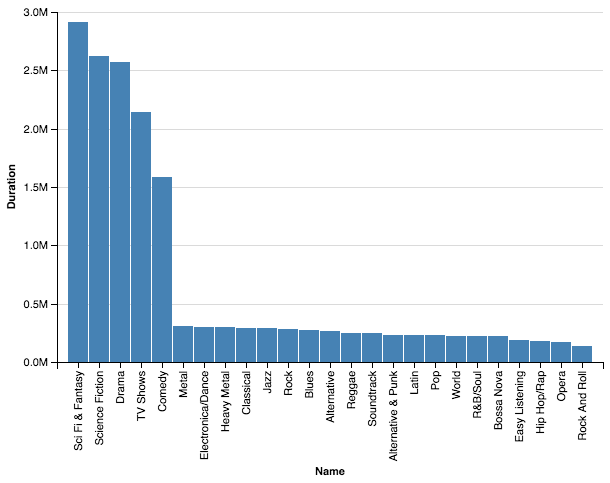

In [25]:
# YOUR CODE HERE
Chart(j1).mark_bar().encode(
    X('Name', sort=SortField(field='Duration', order='descending', op = 'max')),
    Y('Duration')
    
)

Join the `MediaType` and `Track` tables and count how many tracks are released with a given media format. Order by the count of the media type. Save the result in a variable named `j2` and show the table:

In [26]:
inspector.get_table_names()

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

In [27]:
# YOUR CODE HERE
j2 = sql.read_sql_query("""
SELECT MediaType.Name As Name, Count(Track.Name) AS Count FROM Track
  INNER JOIN MediaType
  ON MediaType.MediaTypeID = Track.MediaTypeID
  GROUP BY MediaType.MediaTypeID
  ORDER BY Count DESC
  """, ce)
j2

,Name,Count
0,MPEG audio file,3034
1,Protected AAC audio file,237
2,Protected MPEG-4 video file,214
3,AAC audio file,11
4,Purchased AAC audio file,7


In [28]:
assert list(j2.columns)==['Name', 'Count']
assert len(j2)==5

Make a bar plot of the media type counts:

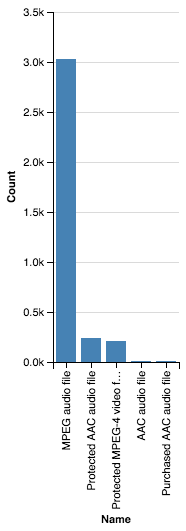

In [29]:
# YOUR CODE HERE
Chart(j2).mark_bar().encode(
    X('Name', sort=SortField(field='Count', order='descending', op = 'max')),
    Y('Count')
    
)